In [1]:
import entries_parsing as ep

time_dlgm = "../Time-DLGM/entries"
rnn = "../RNN/entries"


data_rnn = ep.get_file(rnn)
data_dlgm = ep.get_file(time_dlgm)

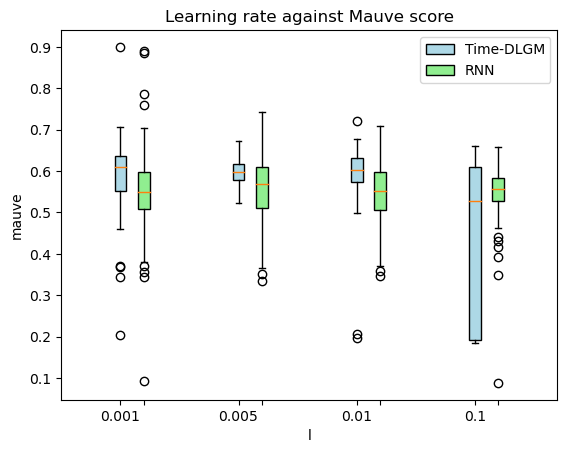

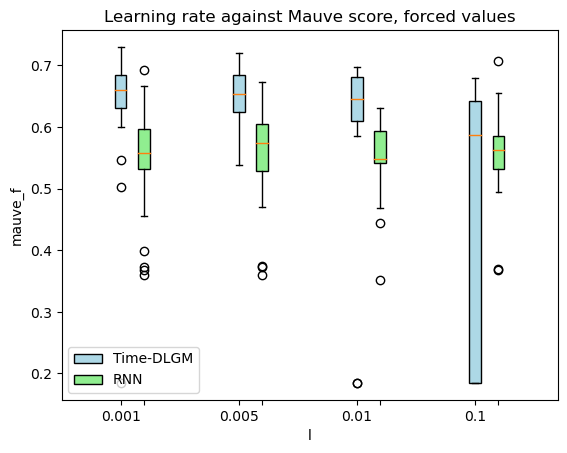

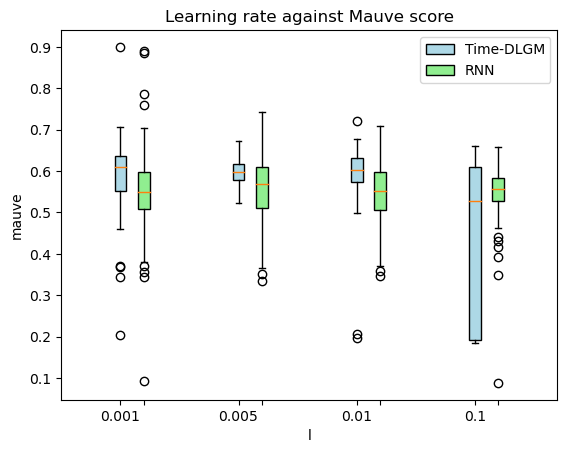

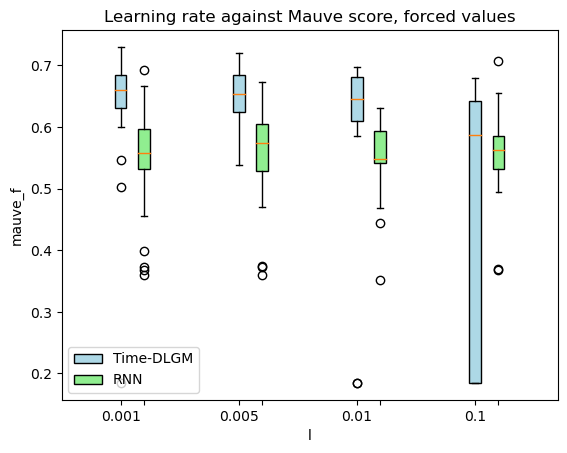

In [2]:


ep.multiple_box_plots(data_dlgm, data_rnn,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score")


ep.multiple_box_plots(data_dlgm, data_rnn,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values")





ep.multiple_box_plots(data_dlgm, data_rnn,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score")


ep.multiple_box_plots(data_dlgm, data_rnn,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values")

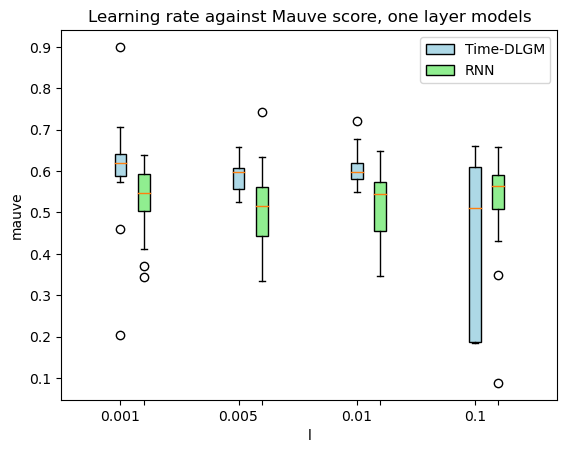

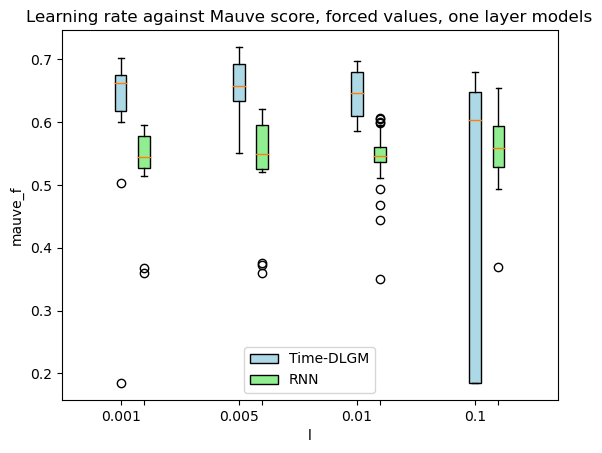

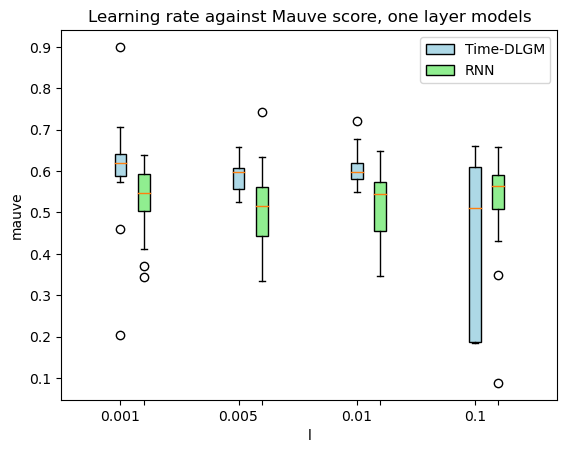

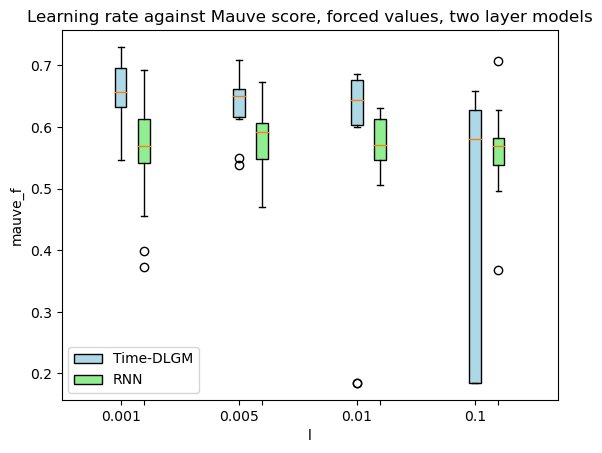

In [3]:
rnn_one = ep.get_entries_with_value(data_rnn, "layers", "1")
rnn_two = ep.get_entries_with_value(data_rnn, "layers", "2")
dlgm_one = ep.get_entries_with_value(data_dlgm, "layers", "1")
dlgm_two = ep.get_entries_with_value(data_dlgm, "layers", "2")





ep.multiple_box_plots(dlgm_one, rnn_one,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, one layer models")


ep.multiple_box_plots(dlgm_one, rnn_one,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values, one layer models")


ep.multiple_box_plots(dlgm_one, rnn_one,
                     x_label="l", y_label="mauve",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, one layer models")


ep.multiple_box_plots(dlgm_two, rnn_two,
                     x_label="l", y_label="mauve_f",
                     label_1="Time-DLGM", label_2="RNN",
                     title="Learning rate against Mauve score, forced values, two layer models")


